# Example - 58 - User-defined CD Mach Function - Earth Re-entry

This example illustrates using a user-defined CD Mach function for Earth re-entry.

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
from scipy.interpolate import interp1d

In [3]:
planet = Planet("EARTH")
planet.loadAtmosphereModel("../atmdata/Earth/earth-gram-avg.dat", 0, 1, 2, 3)

In [4]:
vehicle1 = Vehicle("Apollo-AS-201-A", 5400.0, 400.0, 0.3, 12.0, 0.0, 3.0, planet)
vehicle2 = Vehicle("Apollo-AS-201-B", 5400.0, 400.0, 0.3, 12.0, 0.0, 3.0, planet, userDefinedCDMach=True)
vehicle3 = Vehicle("Apollo-AS-201-C", 5400.0, 400.0, 0.3, 12.0, 0.0, 3.0, planet, userDefinedCDMach=True)

In [5]:
# Example of user defined function for CD(M)
def f(M):
    return 0.9 + 0.5 * np.tanh(M - 1.0)

In [6]:
# Example of user defined function derived from look up table for Mach no. vs CD
xx = np.linspace(0,30,101) # replace with mach no. array, if needed
yy = f(xx)                 # replace with CD array, if needed

# create interpolation function
f_int = interp1d(xx, yy, kind="linear", fill_value=(xx[0], xx[-1]), bounds_error=False)

# vectorize interpolation function.

# **Note**: important, function must return scalar for scalar input, and array for array input!

def g(x):
    # return scalar for scalar input
    if np.size(x) == 1:
        return float(f_int(x))
    # return array for array input
    else:
        return f_int(x)

In [7]:
#set user-defined Mach number function

vehicle2.setCDMachFunction(f) # vehicle2 - set function f
vehicle3.setCDMachFunction(g) # vehicle3 - set function g

In [8]:
# set initial states, copied from Example-15: Apollo AS-201

vehicle1.setInitialState(120.0, 0.0, 0.0, 7.67, 0.0, -9.03, 0.0, 0.0)
vehicle2.setInitialState(120.0, 0.0, 0.0, 7.67, 0.0, -9.03, 0.0, 0.0)
vehicle3.setInitialState(120.0, 0.0, 0.0, 7.67, 0.0, -9.03, 0.0, 0.0)

In [9]:
# set solver params

vehicle1.setSolverParams(1e-6)
vehicle2.setSolverParams(1e-6)
vehicle3.setSolverParams(1e-6)

In [10]:
# propogate vehicle(s) entry;
# t = 2400s
# timestep_max = 0.1 s
# bank_angle = 60 deg

vehicle1.propogateEntry(2400.0, 0.1, 60.0)
vehicle2.propogateEntry(2400.0, 0.1, 60.0)
vehicle3.propogateEntry(2400.0, 0.1, 60.0)

In [11]:
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


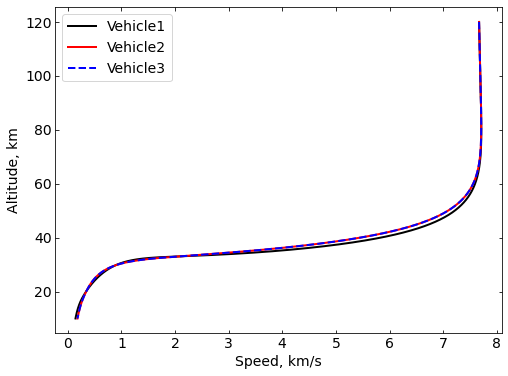

In [12]:
fig = plt.figure(figsize=(8,6))

plt.plot(vehicle1.v_kmsc, vehicle1.h_kmc, 'k',   linewidth=2.0, label='Vehicle1')
plt.plot(vehicle2.v_kmsc, vehicle2.h_kmc, 'r-',  linewidth=2.0, label='Vehicle2')
plt.plot(vehicle3.v_kmsc, vehicle3.h_kmc, 'b--', linewidth=2.0, label='Vehicle3')

plt.xlabel('Speed, km/s',fontsize=14)
plt.ylabel('Altitude, km', fontsize=14)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
plt.legend(loc='upper left', fontsize=14)


plt.savefig('../plots/example-58-user-defined-cd-earth-reentry.png',bbox_inches='tight')
plt.savefig('../plots/example-58-user-defined-cd-earth-reentry.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../plots/example-58-user-defined-cd-earth-reentry.eps', dpi=300,bbox_inches='tight')

plt.show()